# Finding Steady states

Searching steady states in RTG model `rtgMTK` using `find_steady_states()` in `RetroSignalModel.jl` module.

In [1]:
using RetroSignalModel
using ModelingToolkit


In [2]:
paramsets = load_parameters("solution_rtgM4.csv")


294-element Vector{Dict{Num, Real}}:
 Dict(k2I => 4.947912368, k2M => 1604.150283, kn2M => 0.042542555, k13ID => 25.1353459, kn13_c => 220.9151423, k1out => 5967.990312, k3outI => 0.123308493, knBM => 2.412620893, kn13_n => 0.595848762, k3inI => 0.037957422…)
 Dict(k2I => 4.947912368, k2M => 1604.150283, kn2M => 0.042542555, k13ID => 25.1353459, kn13_c => 220.9151423, k1out => 5967.990312, k3outI => 0.123308493, knBM => 2.412620893, kn13_n => 0.595848762, k3inI => 0.037957422…)
 Dict(k2I => 0.079918201, k2M => 3536.520938, kn2M => 0.051692649, k13ID => 1089.874983, kn13_c => 283.3309843, k1out => 1.094658408, k3outI => 284.2623728, knBM => 176.0981546, kn13_n => 35.22621262, k3inI => 0.524908227…)
 Dict(k2I => 0.026595458, k2M => 8.632839458, kn2M => 0.175586325, k13ID => 0.027794041, kn13_c => 67.17413824, k1out => 1351.592282, k3outI => 3.4955471, knBM => 7959.439873, kn13_n => 0.031057969, k3inI => 0.023745964…)
 Dict(k2I => 0.141257236, k2M => 391.1488665, kn2M => 0.016170859, k13I

In [3]:
srange = 0.0:0.05:1.0
nsols = 100
paramidx = 1


1

In [4]:
sols = map(srange) do s
    find_steady_states(;S = t -> s, params=paramsets[paramidx], trajectories=nsols)
end;


In [5]:
count(length.(sols) .!= 1)


5

The system (mostly) has one steady-state for each signal strength.

## Visualization

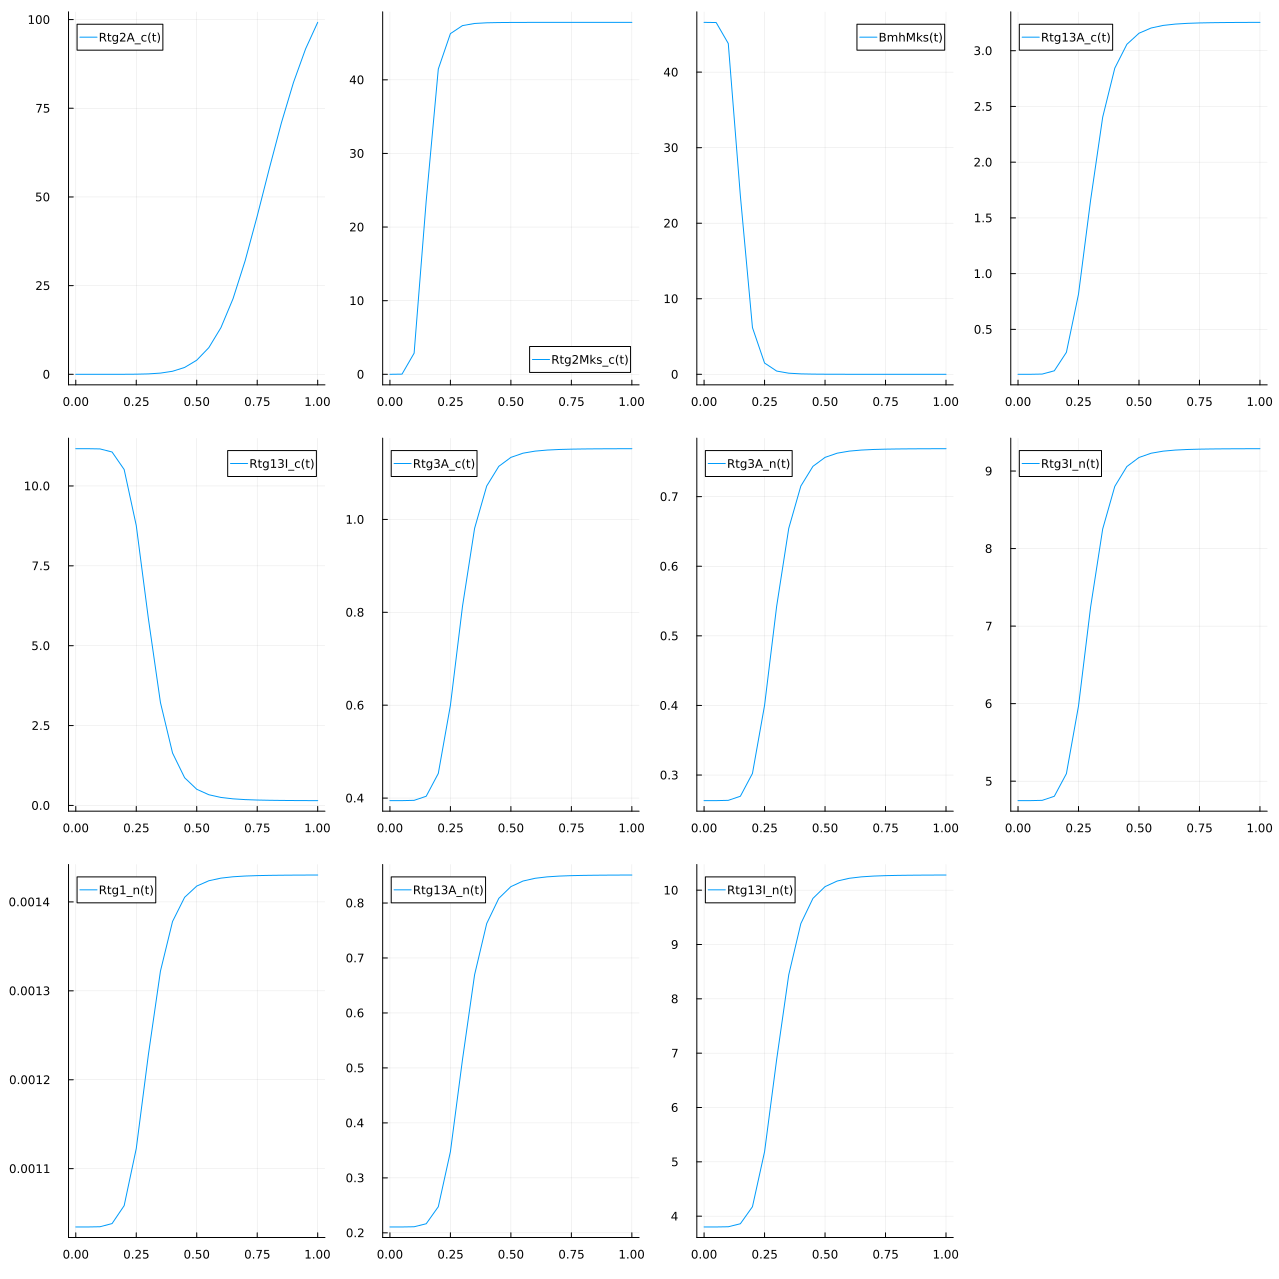

In [6]:
using Plots
import RetroSignalModel as rs

sts = states(rs.RtgMTK(;name=:sys))

pls = map(keys(sts)) do i
    xs = srange
    ys = getindex.(first.(sols), i)
    plot(xs, ys, lab=string(sts[i]))
end

plot(pls..., size=(1280, 1280))
